In [14]:
from nltk.corpus import PlaintextCorpusReader
sonnetsCorpus = PlaintextCorpusReader("sonnets", ".*\.txt")
print(len(sonnetsCorpus.fileids()))

154


In [15]:
import nltk

def get_lists_of_words(corpus, **kwargs):
    documents = []
    for fileid in corpus.fileids():
        words = [token.lower() for token in corpus.words(fileid) if token[0].isalpha()]
        
        if "minLen" in kwargs and kwargs["minLen"]:
            words = [word for word in words if len(word) >= kwargs["minLen"]]
            
        if "stopwords" in kwargs and kwargs["stopwords"]:
            words = [word for word in words if word not in kwargs["stopwords"]]
        
        if "pos" in kwargs and kwargs["pos"]:
            tagged = nltk.pos_tag(words)
            words = [word for word, pos in tagged if pos in kwargs["pos"]]
        
        documents.append(words)
    return documents

In [16]:
sonnetsStopwords = nltk.corpus.stopwords.words('english')
sonnetsStopwords += ["thee", "thou", "thy"]
sonnetsWords = get_lists_of_words(sonnetsCorpus, stopwords=sonnetsStopwords, minLen=3)

for i in range(0,154):
    print("document", str(i), sonnetsWords[i])

document 0 ['fairest', 'creatures', 'desire', 'increase', 'thereby', 'beauty', 'rose', 'might', 'never', 'die', 'riper', 'time', 'decease', 'tender', 'heir', 'might', 'bear', 'memory', 'contracted', 'thine', 'bright', 'eyes', 'feed', 'light', 'flame', 'self', 'substantial', 'fuel', 'making', 'famine', 'abundance', 'lies', 'self', 'foe', 'sweet', 'self', 'cruel', 'art', 'world', 'fresh', 'ornament', 'herald', 'gaudy', 'spring', 'within', 'thine', 'bud', 'buriest', 'content', 'tender', 'churl', 'mak', 'waste', 'niggarding', 'pity', 'world', 'else', 'glutton', 'eat', 'world', 'due', 'grave']
document 1 ['forty', 'winters', 'shall', 'besiege', 'brow', 'dig', 'deep', 'trenches', 'beauty', 'field', 'youth', 'proud', 'livery', 'gazed', 'tatter', 'weed', 'small', 'worth', 'held', 'asked', 'beauty', 'lies', 'treasure', 'lusty', 'days', 'say', 'within', 'thine', 'deep', 'sunken', 'eyes', 'eating', 'shame', 'thriftless', 'praise', 'much', 'praise', 'deserv', 'beauty', 'use', 'couldst', 'answer', 

In [17]:
from gensim import corpora, models


In [18]:
def get_lda_from_list_of_words(lists_of_words, **kwargs):
    # create a dictionary mapping terms to integer IDs and frequency counts
    dictionary = corpora.Dictionary(lists_of_words)

#    dictionary.save_as_text("fname.txt") 

    # convert each document (i.e., each word list in the lists_of_words)
    # into a bag-of-words format
    corpus = [dictionary.doc2bow(text) for text in lists_of_words]
    
    # Model the signficance of the words by document
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    
    # set the dictionary, then do the LDA topic modelling, returning the model to the fxn call
    kwargs["id2word"] = dictionary
    return models.LdaModel(corpus_tfidf, **kwargs)

In [19]:
dictionary = corpora.Dictionary(sonnetsWords)
test2bow = dictionary.doc2bow(sonnetsWords[0])
print(test2bow)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 3)]


In [20]:
sonnetsLda = get_lda_from_list_of_words(sonnetsWords, num_topics=10, passes=20)
print(sonnetsLda)

LdaModel(num_terms=2910, num_topics=10, decay=0.5, chunksize=2000)


In [21]:
def print_top_terms(lda, num_terms=10):
    for i in range(0, lda.num_topics):
        terms = [term for term, val in lda.show_topic(i, num_terms)]
        print("Top 10 terms for topic #", str(i), ": ", ", ".join(terms))

In [22]:
sonnetsLda.print_topic(5)

'0.002*"heart" + 0.002*"looks" + 0.002*"eye" + 0.002*"three" + 0.002*"doth" + 0.002*"beauty" + 0.002*"love" + 0.001*"dead" + 0.001*"sight" + 0.001*"upon"'

In [23]:
print(sonnetsLda.show_topics(num_topics=10))

[(0, '0.002*"kind" + 0.001*"red" + 0.001*"fair" + 0.001*"heaven" + 0.001*"one" + 0.001*"pity" + 0.001*"true" + 0.001*"wires" + 0.001*"wondrous" + 0.001*"mistress"'), (1, '0.002*"shall" + 0.002*"day" + 0.002*"dost" + 0.002*"summer" + 0.002*"honour" + 0.002*"see" + 0.002*"one" + 0.002*"sweet" + 0.001*"let" + 0.001*"age"'), (2, '0.002*"oaths" + 0.002*"doth" + 0.001*"love" + 0.001*"faith" + 0.001*"swear" + 0.001*"say" + 0.001*"makes" + 0.001*"black" + 0.001*"fairest" + 0.001*"art"'), (3, '0.002*"shall" + 0.002*"self" + 0.002*"angel" + 0.002*"time" + 0.002*"hate" + 0.002*"part" + 0.002*"mine" + 0.002*"heart" + 0.002*"wilt" + 0.002*"make"'), (4, '0.002*"reason" + 0.001*"past" + 0.001*"mad" + 0.001*"state" + 0.001*"art" + 0.001*"like" + 0.001*"vile" + 0.001*"elsewhere" + 0.001*"heaven" + 0.001*"suspect"'), (5, '0.002*"heart" + 0.002*"looks" + 0.002*"eye" + 0.002*"three" + 0.002*"doth" + 0.002*"beauty" + 0.002*"love" + 0.001*"dead" + 0.001*"sight" + 0.001*"upon"'), (6, '0.002*"words" + 0.002*"

In [24]:
print_top_terms(sonnetsLda)

Top 10 terms for topic # 0 :  kind, red, fair, heaven, one, pity, true, wires, wondrous, mistress
Top 10 terms for topic # 1 :  shall, day, dost, summer, honour, see, one, sweet, let, age
Top 10 terms for topic # 2 :  oaths, doth, love, faith, swear, say, makes, black, fairest, art
Top 10 terms for topic # 3 :  shall, self, angel, time, hate, part, mine, heart, wilt, make
Top 10 terms for topic # 4 :  reason, past, mad, state, art, like, vile, elsewhere, heaven, suspect
Top 10 terms for topic # 5 :  heart, looks, eye, three, doth, beauty, love, dead, sight, upon
Top 10 terms for topic # 6 :  words, loss, woe, duty, time, friend, excuse, seem, leave, slow
Top 10 terms for topic # 7 :  truth, world, beauty, heart, picture, widow, art, eye, mad, muse
Top 10 terms for topic # 8 :  ten, world, love, times, lest, conscience, best, might, make, abhor
Top 10 terms for topic # 9 :  one, thought, beauty, love, heart, new, doth, every, black, gav


In [26]:
import networkx as nx

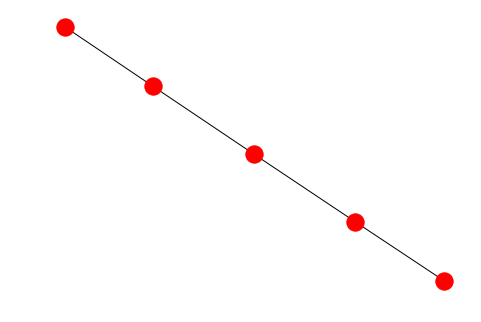

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.Graph()
G.add_edge("A", "X")
G.add_edge("A", "Y")
G.add_edge("B", "X")
G.add_edge("C", "Y")
nx.draw(G)

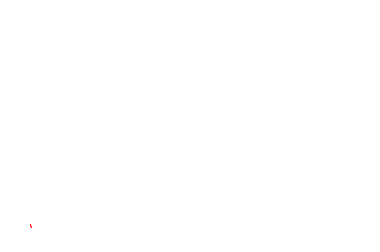

In [29]:
pos = nx.spring_layout(G)
nx.draw_networkx_labels(G, pos, font_color='r') # font colour is "r" for red
nx.draw_networkx_edges(G, pos, alpha=0.1) # set the line alpha transparency to .1
plt.axis('off') # don't show the axes for this plot
plt.show()

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def graph_terms_to_topics(lda, num_terms=10):
    
    # create a new graph and size it
    G = nx.Graph()
    plt.figure(figsize=(10,10))

    # generate the edges
    for i in range(0, lda.num_topics):
        topicLabel = "topic "+str(i)
        terms = [val for val, term in lda.show_topic(i, num_terms)]
        for term in terms:
            G.add_edge(topicLabel, term)
    
    pos = nx.spring_layout(G) # positions for all nodes

    # we'll plot topic labels and terms labels separately to have different colours
  
    g = G.subgraph([topic for topic, _ in pos.items() if "topic " in str(topic)])
    nx.draw_networkx_labels(g, pos,  font_color='r')
    g = G.subgraph([term for term, _ in pos.items() if "topic " not in str(term)])
    nx.draw_networkx_labels(g, pos)
    
    # plot edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.1)

    plt.axis('off')
    plt.show()



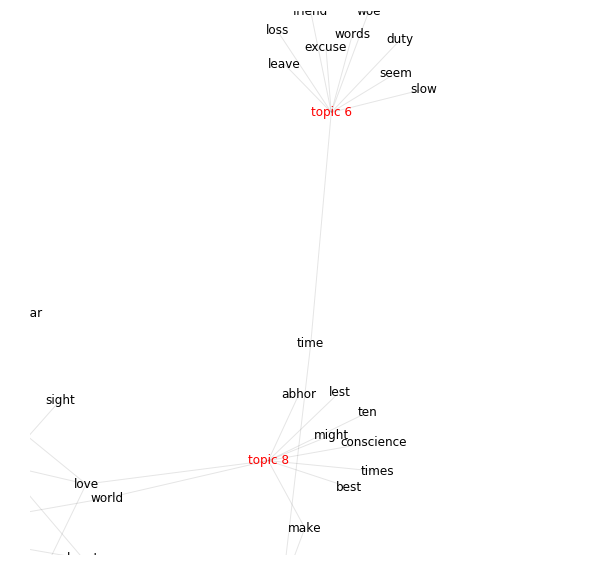

In [31]:
graph_terms_to_topics(sonnetsLda)